<a href="https://colab.research.google.com/github/Soujanya-mallikarjun/repo/blob/main/sutdent_grade_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("/content/student-mat.csv")

In [ ]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
data['G3'].describe()

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

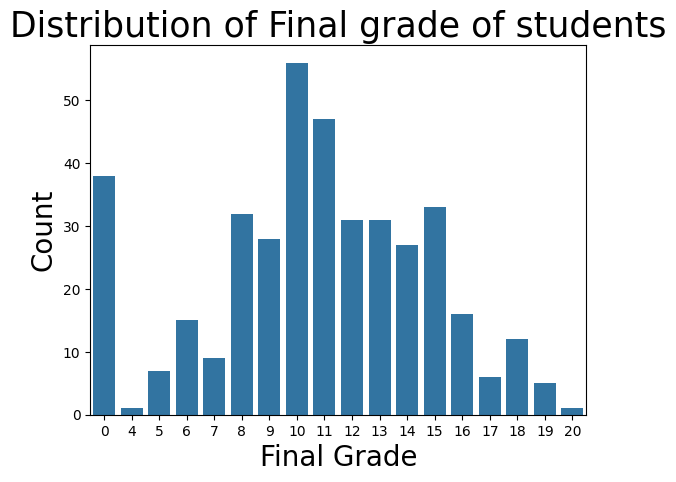

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
demo= sns.countplot(x=data['G3'])
demo.axes.set_title('Distribution of Final grade of students', fontsize = 25)
demo.set_xlabel('Final Grade', fontsize = 20)
demo.set_ylabel('Count', fontsize = 20)
plt.show()

In [ ]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [ ]:
data.shape

(395, 33)

In [ ]:
data.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [ ]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [ ]:
male_student = len(data[data['sex'] == 'M'])
female_student = len(data[data['sex'] == 'F'])
print('Male', male_student)
print('Female', female_student)

Male 187
Female 208


In [ ]:
data['GradeAvg'] = (data['G1'] + data['G2'] + data['G3']) / 3
print(data['GradeAvg'])

0       5.666667
1       5.333333
2       8.333333
3      14.666667
4       8.666667
         ...    
390     9.000000
391    15.333333
392     8.333333
393    11.000000
394     8.666667
Name: GradeAvg, Length: 395, dtype: float64


In [ ]:
def find_grade(data):
  grades = []

  for row in data['GradeAvg']:
    if row >= (0.9 * data['GradeAvg'].max()):
      grades.append('1')
    elif row >= (0.7 * data['GradeAvg'].max()):
      grades.append('2')
    elif row < (0.7 * data['GradeAvg'].max()):
      grades.append('3')

  data['GradeAvg'] = grades
  return data


In [ ]:
data_dum = find_grade(data)

In [ ]:
data_dum.drop(["school", "age"], axis=1, inplace= True)

In [ ]:
data_dum.head()

,sex,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,GradeAvg
0,F,U,GT3,A,4,4,at_home,teacher,course,mother,...,3,4,1,1,3,6,5,6,6,3
1,F,U,GT3,T,1,1,at_home,other,course,father,...,3,3,1,1,3,4,5,5,6,3
2,F,U,LE3,T,1,1,at_home,other,other,mother,...,3,2,2,3,3,10,7,8,10,3
3,F,U,GT3,T,4,2,health,services,home,mother,...,2,2,1,1,5,2,15,14,15,2
4,F,U,GT3,T,3,3,other,other,home,father,...,3,2,1,2,5,4,6,10,10,3


In [ ]:
data_dum.columns

Index(['sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob',
       'reason', 'guardian', 'traveltime', 'studytime', 'failures',
       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2', 'G3', 'GradeAvg'],
      dtype='object')

In [ ]:
data_dum[['Medu','Fedu','traveltime','studytime','failures','famrel','freetime','goout','Dalc','Walc','health','absences','G1','G2','G3','GradeAvg','sex']]

,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,GradeAvg,sex
0,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6,3,F
1,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6,3,F
2,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10,3,F
3,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15,2,F
4,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10,3,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2,2,1,2,2,5,5,4,4,5,4,11,9,9,9,3,M
391,3,1,2,1,0,2,4,5,3,4,2,3,14,16,16,2,M
392,1,1,1,1,3,5,5,3,3,3,3,3,10,8,7,3,M
393,3,2,3,1,0,4,4,1,3,4,5,0,11,12,10,3,M


In [ ]:
categorical_d = {'yes': 1, 'no': 0}
data_dum['schoolsup'] = data_dum['schoolsup'].map(categorical_d)
data_dum['famsup'] = data_dum['famsup'].map(categorical_d)
data_dum['paid'] = data_dum['paid'].map(categorical_d)
data_dum['activities'] = data_dum['activities'].map(categorical_d)
data_dum['nursery'] = data_dum['nursery'].map(categorical_d)
data_dum['higher'] = data_dum['higher'].map(categorical_d)
data_dum['internet'] = data_dum['internet'].map(categorical_d)
data_dum['romantic'] = data_dum['romantic'].map(categorical_d)

In [ ]:
categorical_d = {'F': 1, 'M': 0}
data_dum['sex'] = data_dum['sex'].map(categorical_d)

# map the address data
categorical_d = {'U': 1, 'R': 0}
data_dum['address'] = data_dum['address'].map(categorical_d)

# map the famili size data
categorical_d = {'LE3': 1, 'GT3': 0}
data_dum['famsize'] = data_dum['famsize'].map(categorical_d)

# map the parent's status
categorical_d= {'T': 1, 'A': 0}
data_dum['Pstatus'] = data_dum['Pstatus'].map(categorical_d)

# map the parent's job
categorical_d = {'teacher': 0, 'health': 1, 'services': 2,'at_home': 3,'other': 4}
data_dum['Mjob'] = data_dum['Mjob'].map(categorical_d)
data_dum['Fjob'] = data_dum['Fjob'].map(categorical_d)

# map the reason data
categorical_d= {'home': 0, 'reputation': 1, 'course': 2,'other': 3}
data_dum['reason'] = data_dum['reason'].map(categorical_d)

# map the guardian data
categorical_d = {'mother': 0, 'father': 1, 'other': 2}
data_dum['guardian'] = data_dum['guardian'].map(categorical_d)

In [ ]:
from sklearn.model_selection import train_test_split
x = data_dum.drop("G3", axis=1)
y = data_dum['G3']

In [ ]:
data_dum['G3']

0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=44)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
L=LinearRegression()

In [ ]:
L.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = L.predict(X_test)

In [ ]:
print(L.score(X_test, y_test))

0.8516317843828783
